# Canopy radiative transfer modelling
## J Gómez-Dans (UCL & NCEO)

### Introduction

So far, we have only considered the optical properties of a single leaf. However, in most practical scenarios, you will be dealing with a canopy, a spatial arrangement of leaves. The optical properties of individual leaves will of course control the canopy reflectance, but the overall signal will be a combination of the leaf properties and the canopy structural properties (as well as the contribution from the soil and the atmosphere, if you have not corrected for it). It is critical to understand this: you will not get sensible results trying to understand the signal of a canopy using and assuming it is a single leaf. In this Session, we will contemplate the use of a simple RT modelling approach

### Describing a canopy

Perhaps the first step is to provide a simple definition of a canopy that somehow abstracts some of the complexity found in a real world canopy. Perhaps the first obvious step is to consider the elements that we will need to understand. These include the description of the canopy architecture (e.g. the geometrical arrangement of leaves, branches, etc.), the optical properties of the elements of the canopy (for example, the leaf reflectance and transmittance), and the optical properties of the bottom boundary, the soil layer.

To describe the canopy, we assume that a canopy is just a volume made up of leaves (this assumes that contribution from other woody material is relatively low). To describe such an object, we need three elements:

* the vertical leaf area density function $u_{L}(z)\,\left(m^{2}m^{-3}\right)$,
* the vertical leaf *number* density function (e.g. the number of particles per unit volume), $N_{v}(z)\,\left(N\,particles\, m^{-3}\right)$ might be used as an alternative.
* The angular orientation of the leaves, expressed by the distribution of the leaf normal angles, $g_{L}(z, \vec{\Omega}_{L})$ (dimensionless),
* The leaf size distribution, defined as area density to leaf number density and thickness. 

The last concept is important for microwave modelling, as the size of the elemental scatterers is of the same order as the wavelength. In the optical domain, the size of the leaves is always large compared to the wavelength, so this concept is only weakly relevant.

#### Leaf Area

The vertical profile of one-sided leaf area is described by $u_{L}(z)$ (where $z$ is canopy vertical depth). In the optical domain, we tend to prefer this term to vertical leaf number density, $N_{v}(z)$ as the relevant term is the projection of leaf area. For a constant leaf area, $A_{L}$, we can write 

$$
u_{L}(z) = N_{v}(z)A_{L}.
$$

The integral of $u_{L}(z)$ over the height of the canopy $H$ is the leaf area index (LAI, $L$),  a unitless magnitude that describes the amount of one sided leaf area per unit ground:

$$
L = \int_{z=0}^{z=H}u_{L}(z)dz.
$$

We clearly need to have a shape for $u_{L}(z)$. Many different approaches have been explored, informed by the actual distribution in leaf area in a typical canopy. For example, a common observation is that tree canopies tend to have more leaf area towards the top than at the bottom. This situation can be modelled by either having layers with different leaf area densities, or by a continuous transition. However, the simplest possible description is a canopy where the leaf area is constant over height so $u_{L} = \frac{L}{H}$. This so-called turbid medium assumption is depicted below

![Turbid medium diagram](Image47.gif)

#### The leaf angle distribution function, $g_{L}(z,\Omega')$

The leaf normal angle distribution (or leaf angle distribution) is defined as a function of the leaf normal vector, $\vec{\Omega}_{L}$, and it is defined so that the integral over the upper hemisphere is unity, or

$$
\int_{2\pi} g_{L}(\vec{\Omega}_{L})d\vec{\Omega}_{L} = 1.
$$
The geometry can be seen below

![Geometry of a leaf](Image49.gif)

In many cases, we assume that the azimuthal variation of leaf angle is independent of the zenithal variation of leaf angle, so that $g_{L}(\vec{\Omega})=g_{L}(\theta_{L})\cdot h_{L}(\phi_{L})$. Moreover, we can further assume that the azimuthal variation is constant so that $h_{L}(\phi_L)=1$, and therefore we have that


$$
\int_{2\pi} g_{L}(\vec{\Omega}_{L})d\vec{\Omega}_{L} = \int_{\theta_{L}=0}^{\theta_{L}=\frac{\pi}{2}} g_{L}(\theta_{L})d\theta_L = 1.
$$

Note that this last simplification is not often valid! Effects such as competition with other individuals, wind, stress or heliotropism might call it into question. However, due to its simplicity, this assumption is made in most RT modelling, and we'll take is as acceptable for our discussion.

We still miss a form for the leaf angle distribution function. Typically, a few *archetype distributions* are used. These are

* **Planophile** $g_{L}(\theta)=3\cos^{2}\theta_{L}$. Most leaf normals vertical
* **Erectophile** $g_{L}(\theta)=\frac{3}{2}\sin^{2}\theta_{L}$. Most leaf normals horizontal
* **Spherical** $g_{L}(\theta)=1$. Leaf normals uniform (as pasted on a sphere).
* **Plagiophile** $g_{L}(\theta)=\frac{15}{8}\sin^{2}2\theta_{L}$. Most leaf normals at 56$^\circ$.
* **Eextremophile** $g_{L}(\theta)=\frac{15}{7}\cos^{2}\theta_{L}$. Most leaf normals at the extremes (0 and 90$^{\circ}$).

A number of different versions of these forms have been developed in the literature. In many applications, and due to its simplicity, the spherical distribution is chosen. However, this particular distribution has been found to be not particularly good at describing a range of species!

#### Soils

Generally speaking, the most important properties governing soil effects are soil moisture, soil type and surface roughness. In the optical domain, increases in soil moisture result in a decrease in reflectance which is particularly exacerbated in the water absorption bands.

![Effect of soil moisture on reflectance](leblon1_2.gif)

The soil type or texture essentially controls the *spectral* behaviour of soils at optical wavelengths. There is little variation in soil spectra. In a seminal study, Price performed a principal component analysis on many soil spectra, and found that 99.6% of the variation was explained by just the first four principal components. Similar studies have arrived at similar conclusions

Soil roughness effects include specular effects in a smooth surface. Additional (but small) surface roughness tends to result in a broadening of the specular reflectance peak. For higher roughness levels, models based on facets distribution, and models that consider the protrusion of surfaces and the shadows they cast are useful. Volumetric effects of soils are typically modelled by simple extensions of the turbid medium radiative transfer theory.

In practice, soil requirements are modest in most canopy RT models, either assuming a Lambertian BRDF of the soil, or using semi-empirical models (such as Walthall), or in some cases, Hapke-type (volumetric effects) models. The spectral soil properties are usually taken to be linear combinations of the Price functions.



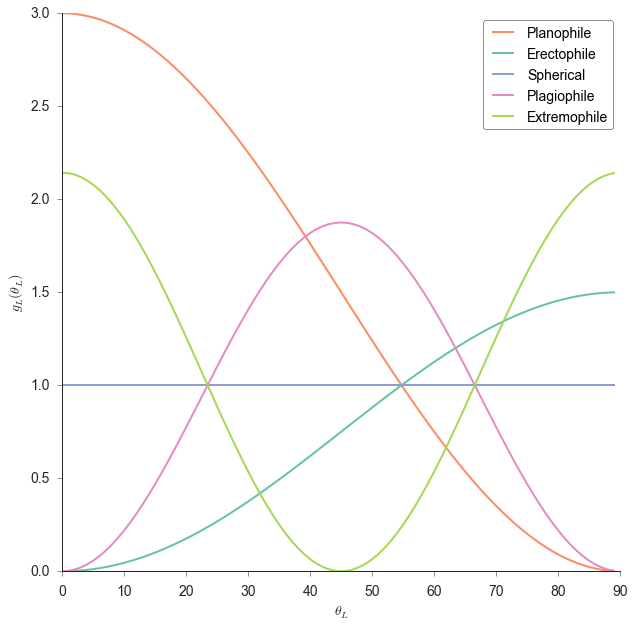

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from prosail_functions import pretty_axes, plot_config
plot_config()
%matplotlib inline
plt.figure( figsize=(10,10))
theta = np.arange ( 0, 90 ) 
thetar = np.deg2rad ( theta )
plano = 3*(np.cos ( thetar ))**2
plt.plot(theta, plano, '-', label="Planophile")
erecto = 1.5*(np.sin ( thetar ))**2
plt.plot(theta, erecto, '-', label="Erectophile")
spherical = np.ones_like ( thetar )
plt.plot(theta, spherical, '-', label="Spherical")
plagio = (15./8.)*(np.sin ( 2.*thetar ))**2
plt.plot(theta, plagio, '-', label="Plagiophile")
extrem = (15./7.)*(np.cos ( 2.*thetar ))**2
plt.plot(theta, extrem, '-', label="Extremophile")
plt.xlabel(r'$\theta_{L}$')
plt.ylabel(r'$g_{L}(\theta_{L})$')
plt.legend ( loc='best' )         
pretty_axes()



### The radiative transfer equation

Throughout this discussion, we will consider a plane parallel geometry, as depicted below.

![Plane parallel geometry](Image111.gif)

The RTE describes the change of in incident radiance intensity at a specific height and direction $I(z,\vec{\Omega})$.

$$
\mu\cdot\frac{\partial I(z,\vec{\Omega})}{\partial z} = -\kappa_{e}\cdot I(z,\vec{\Omega}) + J_{s}(z,\vec{\Omega}),
$$

where $\mu$ is the cosine of the view azimuth angle. Its effect is to account for the path length through the canopy. $\kappa_{e}$ is the volume extinction coefficient, and it accounts for the attenuation of the incoming radiation by the medium. The second term of the right hand side of the equation stands for the radiation scattered from all directions into the view direction $\vec{\Omega}$, 

$$
J_{s}(z,\vec{\Omega}) = \int_{4\pi} P(z,\vec{\Omega}'\rightarrow\vec{\Omega})I(\vec{\Omega}, \vec{\Omega}')d\vec{\Omega}',
$$

where $P(\cdot)$ is the volume scattering phase function. Additionally, we might want to add an emission term $J_{e}(z,\vec{\Omega})$ to include radiation emmitted by the canopy. This term is important in the thermal and passive microwave domains, but is of limited impact in the optical domain, with the exception of fluorescence.

#### Beer's Law

The volume extinction coefficient $\kappa_{e}(z)$ (dependence on wavelength is implicit) is an indication of th attenuation of radiation as it crosses a medium. If we have a medium that is homogeneous, and consists of a uniform distribution of scatterers, then radiation $I$ travelling over a path length $L$ will be attenuated exponentially as

$$
I(L) = I(0)\exp\left( -\kappa_{e}\cdot L \right),
$$
where $I(0)$ is the intensity at the top of the layer. We can further depict the extinction coefficient as the product of the medium particle density $N_{v}$ and the extinction cross section for a particle, $Q_e(\vec{\Omega})$ (units of $m^{-2}$). We might also want to write $\kappa_{e}$ as the sum of radiation that is absorbed by the particles in the medium, and radiation that is scattered away from $\vec{\Omega}$. It is also useful to introduce the term optical thickness as $\tau=\int_{x=0}^{x=L}\kappa_{e}(x)dx$. Finally, the single scattering albedo is the probability of radiation being scattered to radiation being absorbed.

The previous discussion only considered a uniform distribution of scatterers, but what happens if we have a clear orientation of our scatterers (leaves)? We can define an effective particle extinction coefficient as

$$
Q_e(\vec{\Omega})=G(\vec{\Omega})A_{L},
$$
where have ignored the variation with respect to canopy depth, and introduced a constant leaf area $A_{L}$. The *G function* $G(\vec{\Omega})$ is a dimensionless factor equal to the projection of a unit area of foliage on a plane perpendicular to the direction $\vec{\Omega}$, averaged over elements of all orientations, or the probability of hitting a leaf for a beam of photons travelling in direction $\vec{\Omega}$:

$$
G(\vec{\Omega})=\int_{2\pi} g_{L}(\vec{\Omega}')\left| \vec{\Omega}\cdot\vec{\Omega}'\right| d\vec{\Omega}'.
$$

For a spherical leaf angle distribution, $G=0.5$. Similarly, for azimuthally independent horizontal distribution $G=\cos\theta$. For a vertical distribution, $G=\frac{2}{\pi}\sqrt{1-\cos^2\theta}$.  

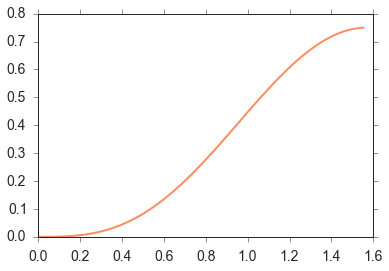

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import dblquad

plano = lambda thetar: 3*(np.cos ( thetar ))**2
erecto = lambda thetar: 1.5*(np.sin ( thetar ))**2
spherical = lambda thetar: np.ones_like ( thetar )
plagio = lambda thetar: (15./8.)*(np.sin ( 2.*thetar ))**2
extrem = lambda thetar: (15./7.)*(np.cos ( 2.*thetar ))**2


theta = np.deg2rad(np.arange ( 0, 90))
for gfunc in [ plano]:#, erecto, spherical, plagio, extrem]:
    G=[]
    for tr in theta:
        def integrand ( y, x  ):
            return erecto(tr)*np.sin(tr)*np.cos(x)*np.sin(x)/(2.*np.pi)

        ans, err = dblquad ( integrand, 0, np.pi/2, \
                            lambda x: 0, lambda x: 2*np.pi )
        G.append ( ans )
    plt.plot( theta, G, '-' )

We observe that the $G$ function varies smoothly with values between 0.3 and 0.8. Interestingly, the $G$ function for all of the proposed forms of $g_{L}(\theta)$ is around 0.5 at 57.5$^{\circ}$. Working this through our previous definition of $\kappa_{e}$, we have that

$$
\kappa_{e}=u_{L}G(\vec{\Omega}).
$$

If we now substitute this into the equation that governs the change of intensity as the beam traverses a medium, 

$$
I(z)=I(0)\exp\left[-u_{L}\cdot G\left(\vec{\Omega}\right)\cdot \frac{z}{\mu}\right],
$$
or in other words, the attenuation is exponential and controlled by depth the ray traverses through the canopy and the leaf projection function $G$. Similarly, we can now calculate the vegetation optical depth at the bottom of a canopy $(z=-H)$ as

$$
\tau(-H)=\int_{t=0}^{t=l}\kappa_e(t)dt = \int_{z=0}^{-H}-\frac{u_{l}\cdot G(\vec{\Omega})}{\mu}dz.
$$

For the simple case where the leaf angle distribution is spherical, we have that the radiation at the bottom of the canopy is just $I_0\exp\left(-\frac{0.5\cdot L}{\mu}\right)$ and for a horizontal distribution we have that $I_0\exp\left(-L\right)$.

### Putting it all together.

In the previous paragraphs, we have explored the different elements that go into the basic radiative transfer equation. It is time to put them together, and to solve the RT equation. While the procedure is straightforward, its derivation is outside the scope of these notes, and the interested reader is directed to a specialist text for more details. We'll note a few assumptions:

1. We will assume leaves to be bi-Lambertian (i.e., exhibiting no directional characteristics).
2. We shall also assume that the reflectance and transmittance are linearly related by factor $k=1 +\tau_{l}/\rho_{l}$.
3. For simplicity, we'll assume a spherical leaf angle distribution.

From these assumptions, we can calculate the phase function $P(\vec{\Omega'}, \vec{\Omega})$ as

$$
P(\vec{\Omega}', \vec{\Omega}) = \frac{u_{L}}{\mu'}\frac{\rho_{l}\cdot k}{3\pi}\left(\sin \gamma + \left(\frac{\pi}{k}-\gamma\right)\cdot\cos\gamma\right),
$$
where $\gamma$ is the phase angle between the view and illumination directions $(\cos\gamma=|\vec{\Omega}\cdot\vec{\Omega}'|)$. We can then find an expression for the **first order scattering** from the canopy as

$$
\begin{align}
\rho^{1}_{c} &= \exp\left[-\frac{L}{2}\left(\frac{\mu_0+\mu_s}{\mu_0\cdot\mu_s}\right)\right]\rho_{soil}(\vec{\Omega}_s,\vec{\Omega}_0)  \\
&+\frac{2}{\mu_s+\mu_0}\cdot\frac{\rho_{l}\cdot k}{3\pi}\left(\sin \gamma + \left(\frac{\pi}{k}-\gamma\right)\cdot\cos\gamma\right)\cdot \left\lbrace1 - \exp\left[-\frac{L}{2}\left(\frac{\mu_0+\mu_s}{\mu_0\cdot\mu_s}\right)\right]\right\rbrace.
\end{align}
$$

While this equation looks like quite of a mouthful, we gain some insight into it. 

* The first term,

$$
\exp\left[-\frac{L}{2}\left(\frac{\mu_0+\mu_s}{\mu_0\cdot\mu_s}\right)\right]\rho_{soil}(\vec{\Omega}_s,\vec{\Omega}_0)
$$
represents radiation travelling through the canopy, being scattered by the soil with a soil reflectance governed by $\rho_{soil}$, and then travelling out of the canopy in the scattering direction $\mu_s$. This process is attenuated twice: once on the way to the soil, and once on the upward scattering flux. Note the dependence on LAI: with a high LAI value, the strong attenuation in and out of the canopy will minimise the contribution from the soil. The opposite will be true if LAI is low.

* The second term

$$
\frac{2}{\mu_s+\mu_0}\cdot\frac{\rho_{l}\cdot k}{3\pi}\left(\sin \gamma + \left(\frac{\pi}{k}-\gamma\right)\cdot\cos\gamma\right)\cdot \left\lbrace1 - \exp\left[-\frac{L}{2}\left(\frac{\mu_0+\mu_s}{\mu_0\cdot\mu_s}\right)\right]\right\rbrace
$$

consists of volumetric scattering by the canopy, controlled by the leaf single scattering albedo (through $\rho_l$ and $k$), and the double projection of the leaf angle disribution. There's an additional inverse relationship with the view and illumination angles and the $G$ function. LAI also controlls this term, which makes the term in curly braces approach unity when LAI is high, and dampens the entire contribution when LAI is low.

In [1]:
from IPython.core.display import HTML

def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()